## 3. Modelado NLP

In [1]:
# Importamos librerías

import pandas as pd

# Cargamos el dataframe preprocesado
# Introducir en path_file la ruta donde hemos guardado el dataset tras la fase de preprocesado

path_file = "XXXXX/df_videogames_processed.csv" 
df_videogames_processed = pd.read_csv(path_file, sep=',')

In [9]:
# Importamos librerías

!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Creamos los conjuntos de entrenamiento (70%) y test (30%)

X_train, X_test, y_train, y_test = train_test_split(df_videogames_processed['processedreviews'], df_videogames_processed['sentiment_label'], train_size=0.70, test_size=0.3,
                                                    random_state=1, shuffle=True)

In [10]:
# Extraemos las características utilizando vectorización TF-IDF
# Establecemos un número máximo de carácterísticas de 4500 (palabras) y un mínimo de apariciones de 3, todo para palabras individuales.

cv = TfidfVectorizer(
    max_df=0.95,
    min_df=3,
    max_features=4500,
    strip_accents='ascii',
    ngram_range=(1, 1)
)
cv.fit(X_train)

TfidfVectorizer(max_df=0.95, max_features=4500, min_df=3, strip_accents='ascii')

In [11]:
# Observamos por pantalla los 25 últimos términos del vocabulario

list(cv.vocabulary_.items())[:25]

# Comprobamos que la longitud del vocabulario es la establecida previamente

len(cv.vocabulary_)

4500

In [12]:
# Vectorizamos los set de train y test

X_train_ = cv.transform(X_train)
X_test_ = cv.transform(X_test)

# Importamos librerías

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Comenzamos el entrenamiento y predicción para un primer modelo sencillo de machine learning: regresión logística
# Hacemos pruebas con hasta 5 valores distintos para el parámetro 'c' e imprimimos por pantalla el accuracy para las distintas predicciones/valores de 'c'

c_params = [0.01, 0.5, 1, 100, 1000, 10000]

for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=10000)
    lr.fit(X_train_, y_train)

    train_predict = lr.predict(X_train_)
    test_predict = lr.predict(X_test_)

    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))

Accuracy for C=0.01: 0.7706684627041589
Accuracy for C=0.5: 0.8242128304428354
Accuracy for C=1: 0.8280855362855699
Accuracy for C=100: 0.8055228152887691
Accuracy for C=1000: 0.796514564741539
Accuracy for C=10000: 0.795841050681933


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........................................max_depth=1; total time=   2.6s
[CV] END ........................................max_depth=1; total time=   2.3s
[CV] END ........................................max_depth=1; total time=   2.5s
[CV] END ........................................max_depth=1; total time=   2.5s
[CV] END ........................................max_depth=1; total time=   2.5s
[CV] END ........................................max_depth=5; total time=   5.1s
[CV] END ........................................max_depth=5; total time=   5.1s
[CV] END ........................................max_depth=5; total time=   5.2s
[CV] END ........................................max_depth=5; total time=   5.0s
[CV] END ........................................max_depth=5; total time=   5.0s
[CV] END .......................................max_depth=10; total time=  10.2s
[CV] END .......................................m

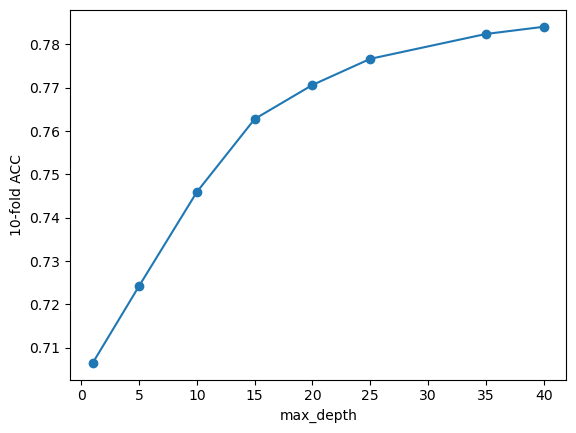

In [13]:
# Importamos librerías

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Comenzamos el entrenamiento para un segundo modelo de machine learning, algo más complejo que el anterior: random forest
# Lanzamos el train con grid search para encontrar el valor óptimo para el parámetro 'max_depth'

maxDepth = maxDepth = [1, 5, 10, 15, 20, 25, 35, 40]
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=500, max_features='sqrt'),  scoring='accuracy', param_grid=tuned_parameters,cv=5, verbose=2)
grid.fit(X_train_, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Visualizamos resultados para los distintos valores probados con grid search con objeto de asegurar que el valor óptimo encontrado no corresponde a un mínimo local
scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')
plt.show()

# Observamos que los resultados de un 'depth' de entre 35 y 40 mejoran muy poco, por lo que fijamos el mejor valor para el parámetro en 40

In [14]:
# Encontrado un valor óptimo para max_depth entrenamos el modelo con el conjunto de train

maxDepthOptimo = grid.best_params_['max_depth']
rf = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=500,max_features='sqrt').fit(X_train_, y_train)

# Entrenado el modelo calculamos accuracy para test
print("Test: ",rf.score(X_test_, y_test))

# Con esto damos por finalizado este segundo modelo, obteniendo un accuracy ligeramente inferior al obtenido con regresión logística

Test:  0.7872537464219566


### Reporte de métricas y conclusiones

In [18]:
# Importamos librerías

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Report del modelo 1: Regresión logística

lr = LogisticRegression(C=1, solver='lbfgs', max_iter=10000)
lr.fit(X_train_, y_train)
test_predict = lr.predict(X_test_)

print('**Report del modelo 1: Regresión logística**')
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

**Report del modelo 1: Regresión logística**
Confussion matrix:
[[5027  970]
 [1072 4809]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      5997
         1.0       0.83      0.82      0.82      5881

    accuracy                           0.83     11878
   macro avg       0.83      0.83      0.83     11878
weighted avg       0.83      0.83      0.83     11878

Accuracy score:0.8280855362855699


In [19]:
# Report del modelo 2: Random forest

test_predict2 = rf.predict(X_test_)

print('**Report del modelo 2: Random forest**')
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict2)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict2)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict2)))

**Report del modelo 2: Random forest**
Confussion matrix:
[[4637 1360]
 [1167 4714]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79      5997
         1.0       0.78      0.80      0.79      5881

    accuracy                           0.79     11878
   macro avg       0.79      0.79      0.79     11878
weighted avg       0.79      0.79      0.79     11878

Accuracy score:0.7872537464219566


# Conclusiones

El testeo de los dos modelos demuestra que no siempre los más complejos arrojan mejores resultados. En este caso un modelo simple de regresión logística consigue un accuracy sensiblemente superior al de un modelo más complejo como random forest.
Además, el análisis desplegado muestra la importancia de utilizar técnicas de grid para la optimización de parámetros en la obtención de los mejores resultados.